In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import cm
import matplotlib.patches as mpatches
import seaborn as sns
import difflib
%matplotlib inline

In [2]:
shark_data=pd.read_csv("GSAF5.csv", encoding = "ISO-8859-1")
shark_data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2019.12.30,30-Dec-19,2019.0,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,male,M,...,"Shovelnose ""shark"" which is a ray, not a shark)","B. Myatt, GSAF",2019.12.30-Queensland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.30,2019.12.30,6492,NaN,NaN
1,2019.12.28,28-Dec-19,2019.0,Unprovoked,SEYCHELLES,Praslin,AmitiÃ© Beach,Swimming,female,F,...,NaN,Seychelles News Agency,2019.12.28-Seychelles.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.28,2019.12.28,6491,NaN,NaN
2,2019.12.26,26-Dec-19,2019.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surf skiing,Roger Swinney,M,...,NaN,"Times Live, 12/26/2019",2019.12.26-Swinney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.26,2019.12.26,6490,NaN,NaN
3,2019.12.21,21-Dec-19,2019.0,Unprovoked,USA,California,"Santa Rosa Island, Ventura County",Surfing,Adam Coons,M,...,NaN,"R. Collier, GSAF",2019.12.21-Coons.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.21,2019.12.21,6489,NaN,NaN
4,2019.12.20,20-Dec-19,2019.0,Provoked,AUSTRALIA,New South Wales,Shellharbour,Fishing,NaN,NaN,...,White shark,"B. Myatt, GSAF",2019.12.20-Shellharbour.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.20,2019.12.20,6488,NaN,NaN


In [3]:
# Selecting the columns
col_to_keep = ["Date", "Year", "Type", "Country", "Activity", "Fatal (Y/N)"]
shark_data = shark_data[col_to_keep]
# Renaming columns names
shark_data = shark_data.rename(columns={'Fatal (Y/N)': 'Fatal'})

In [4]:
#Null year values 
shark_data[shark_data["Year"].isnull()]

,Date,Year,Type,Country,Activity,Fatal
364,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Spearfishing,NaN
6268,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Swimming,Y


In [5]:
shark_data.loc[364, "Year"] = 2017
shark_data.loc[6268,"Year"]=1836
shark_data["Year"] = shark_data["Year"].astype("int")
shark_data["Year"].dtype

dtype('int64')

In [6]:
shark_data = shark_data[shark_data["Year"] >= 1700]

In [7]:
#Cleaning Fatal/Non-Fatal Data 
shark_data["Fatal"] = shark_data["Fatal"].fillna("UNKNOWN")
shark_data["Fatal"].value_counts()

N          4393
Y          1336
UNKNOWN     610
 N            7
F             2
Y x 2         1
y             1
N             1
2017          1
M             1
Name: Fatal, dtype: int64

In [8]:
shark_data.loc[shark_data["Fatal"] == " N", "Fatal"] = "N"
shark_data.loc[shark_data["Fatal"] == "n", "Fatal"] = "N"
shark_data.loc[shark_data["Fatal"] == "F", "Fatal"] = "Y"
shark_data.loc[shark_data["Fatal"] == "y", "Fatal"] = "Y"
shark_data.loc[shark_data["Fatal"] == "--M524--M3133Y", "Fatal"] = "UNKNOWN"
shark_data.loc[shark_data["Fatal"] == "Y x 2", "Fatal"] = "UNKNOWN"
shark_data.loc[shark_data["Fatal"] == "2017", "Fatal"] = "UNKNOWN"
shark_data.loc[shark_data["Fatal"] == "M", "Fatal"] = "UNKNOWN"
shark_data.loc[shark_data["Fatal"] == "N ", "Fatal"] = "N"
shark_data["Fatal"].value_counts()

N          4401
Y          1339
UNKNOWN     613
Name: Fatal, dtype: int64

In [9]:
#Cleaning Countires 
shark_data["Country"] = shark_data["Country"].fillna("UNKNOWN")
shark_data["Country"] = shark_data["Country"].fillna("UNKNOWN")
shark_data["Country"] = shark_data["Country"].str.rstrip()
shark_data["Country"] = shark_data["Country"].str.lstrip()
shark_data["Country"] = shark_data["Country"].str.replace("USA","United States")
shark_data["Country"] = shark_data["Country"].str.replace("ST. MAARTIN","SAINT MARTIN")
shark_data["Country"] = shark_data["Country"].str.replace("ST. MARTIN","SAINT MARTIN")
shark_data["Country"] = shark_data["Country"].str.replace("COLUMBIA","Colombia")
shark_data["Country"] = shark_data["Country"].str.replace("UNITED ARAB EMIRATES \(UAE\)","United Arab Emirates")
shark_data["Country"] = shark_data["Country"].str.replace("ENGLAND","United Kingdom")
shark_data["Country"] = shark_data["Country"].str.replace("SCOTLAND","United Kingdom")
shark_data["Country"] = shark_data["Country"].str.replace("(.*)\?","UNKNOWN")
shark_data["Country"] = shark_data["Country"].str.title()
shark_data["Country"] = shark_data["Country"].str.replace("Trinidad & Tobago","Trinidad and Tobago")
shark_data["Country"] = shark_data["Country"].str.replace("^(New Guinea)","Papua New Guinea")
shark_data["Country"] = shark_data["Country"].str.replace("New Britain","Papua New Guinea")
shark_data["Country"].value_counts()

United States                     2308
Australia                         1359
South Africa                       577
Papua New Guinea                   146
New Zealand                        132
Bahamas                            118
Brazil                             114
Mexico                              95
Italy                               70
Fiji                                63
Philippines                         62
Reunion                             58
New Caledonia                       55
Unknown                             45
Cuba                                45
Mozambique                          44
Egypt                               43
Spain                               43
United Kingdom                      42
India                               35
Croatia                             34
Japan                               34
Panama                              30
Jamaica                             28
Solomon Islands                     28
French Polynesia         

In [10]:
#Activities 
shark_data["Activity"].fillna("UNKNOWN")


def code_act(a):
    if isinstance(a, str):
        a = a.lower()
        if 'surfing' in a:
            return "Surfing"
        elif 'swimming' in a:
            return "Swimming"
        elif 'fishing' in a:
            return "Fishing"
        elif 'bathing' in a:
            return "Bathing"
        elif 'wading' in a:
            return "Wading"
        elif 'diving' in a:
            return "Diving"
        else:
            return "Other"
    else:
        return "Other"
shark_data["Activity"] = shark_data["Activity"].apply(lambda x: code_act(x))

In [11]:
import dateparser
#Cleaning Date Column 
shark = shark_data["Date"].astype("str")
shark_data["Date"] = shark_data["Date"].str.replace("Reported", "")
shark_data["Date"] = shark_data["Date"].str.replace("[rR]eport.*d", "")
shark_data["Date"] = shark_data["Date"].str.replace("\.b", "")
shark_data["Date"] = shark_data["Date"].str.replace("\.R", "")
shark_data["Date"] = shark_data["Date"].str.replace("\.", "-")
shark_data["Date"] = shark_data["Date"].str.replace("190Feb", "19-Feb")
shark_data["Date"] = shark_data["Date"].str.replace("Late ", "")
shark_data["Date"] = shark_data["Date"].str.replace("Early ", "-")
shark_data["Date"] = shark_data["Date"].str.replace("Mid.", "15-")
shark_data["Date"] = shark_data["Date"].str.replace("-Ap-", "-Apr-")
shark_data["Date"] = shark_data["Date"].str.replace("-Jut-", "-Jul-")
shark_data["Date"] = shark_data["Date"].str.replace("23-Decp1896", "23-Dec-1896")
shark_data["Date"] = shark_data["Date"].str.replace("Ca.", "")
shark_data["Date"] = shark_data["Date"].str.replace("Jan 1858", "Jan")
shark_data["Date"] = shark_data["Date"].str.replace("to Sep", "Sep")
shark_data["Date"] = shark_data["Date"].str.replace("March", "Mar")
shark_data["Date"] = shark_data["Date"].str.replace("April 1906", "Apr")
shark_data["Date"] = shark_data["Date"].str.replace("May 1871", "May")
shark_data["Date"] = shark_data["Date"].str.replace("Dec 1944", "Dec")
shark_data["Date"] = shark_data["Date"].str.replace("Jan 2011", "Jan")
shark_data["Date"] = shark_data["Date"].str.replace("1949 or Apr", "Apr")
shark_data["Date"] = shark_data["Date"].str.replace(" Jan", "Jan")
shark_data["Date"] = shark_data["Date"].str.replace("May 1927", "May")
shark_data["Date"] = shark_data["Date"].str.replace("Sept", "Sep")
shark_data["Date"] = shark_data["Date"].str.replace(" Sep", "Sep")

shark_data["Date"] = shark_data["Date"].str.lstrip()
shark_data["Date"] = shark_data["Date"].str.rstrip()

In [12]:
shark_data.head()

,Date,Year,Type,Country,Activity,Fatal
0,30-Dec-19,2019,Unprovoked,Australia,Swimming,N
1,28-Dec-19,2019,Unprovoked,Seychelles,Swimming,N
2,26-Dec-19,2019,Unprovoked,South Africa,Other,N
3,21-Dec-19,2019,Unprovoked,United States,Surfing,N
4,20-Dec-19,2019,Provoked,Australia,Fishing,UNKNOWN


In [13]:
shark_data = shark_data[shark_data["Date"].notnull()]


In [14]:
shark_data=pd.concat([shark_data.drop('Date', axis = 1), 
          (shark_data.Date.str.split("-|T").str[:3].apply(pd.Series)
          .rename(columns={0:'Day', 1:'Month', 2:'Abbrv_year'}))], axis = 1)
shark_data.head()

,Year,Type,Country,Activity,Fatal,Day,Month,Abbrv_year
0,2019,Unprovoked,Australia,Swimming,N,30,Dec,19
1,2019,Unprovoked,Seychelles,Swimming,N,28,Dec,19
2,2019,Unprovoked,South Africa,Other,N,26,Dec,19
3,2019,Unprovoked,United States,Surfing,N,21,Dec,19
4,2019,Provoked,Australia,Fishing,UNKNOWN,20,Dec,19


In [15]:
shark_data = shark_data[shark_data["Month"].notnull()]


In [16]:
shark_data["Month"].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan', '1018', '18', '17', '06', '16', '15', '14',
       '12', '13', '10', '09', '08', '2008', '01', '11', '07', '04', '03',
       '2003', '02', '00', '99', '98', '96', '95', '94', '93', '1993',
       '92', '91', '89', '88', '87', '86', '85', '84', '83', '82', '1982',
       '81', '1980', '80', '79', '1978`', '77', '76', '75', '74', '73',
       '72', '1971', '70', '1970', '69', '68', '67', '66', '65', '1965',
       '64', '63', '1963', '62', '1962', '61', '60', 'summer 1960',
       '1961', '59', '1959', '58', '57', '56', '55', '54', '53', '52',
       '1954', '51', '50', ' 1951', '49', '1950', '48', '47', '46', '45',
       '44', '1944', '43', '42', '41', '40', '36', '35', '34', '32', '30',
       '28', '1928', '27', '26', '25', '23', '1924', '21', '1905', '05',
       ' 22', '1900', '1900s', '1898', 'American War)', '1899', '1895',
       '1889', '1888', '1886', '1882', '1870s', ' or Dec', 

In [17]:
def get_month(month):
    m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if month in m:
        return month
    else:
        return "other"

shark_data["Months"] = shark_data["Month"].apply(lambda x: get_month(x))

In [20]:
shark_data["Months"].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan', 'other'], dtype=object)

In [21]:
#Hemispheres 
def get_hemisphere(country):
    southern_hemisphere = [
    "South Africa", "Reunion", "Mozambique", "Tanzania", "Mauritius", "Seychelles", 
    "Madagascar", "Namibia", "Mayotte", "Gabon", "Indonesia", "Brazil", "Ecuador", 
    "Argentina", "Chile", "Paraguay", "Uruguay", "Australia", "Papua New Guinea",
    "Fiji", "Papua New Guinea", "British New Guinea", "South Atlantic Ocean", "Indian Ocean", 
    "South Pacific Ocean", "Tasman Sea","Solomon Islands / Vanuatu"]
    if country in southern_hemisphere:
        return "S"
    if country == "Unknown":
        return np.nan
    else:
        return "N"

shark_data["Hemisphere"] = shark_data["Country"].apply(lambda x: get_hemisphere(x))

[Text(0, 0.5, ''), Text(0.5, 0, 'Month')]

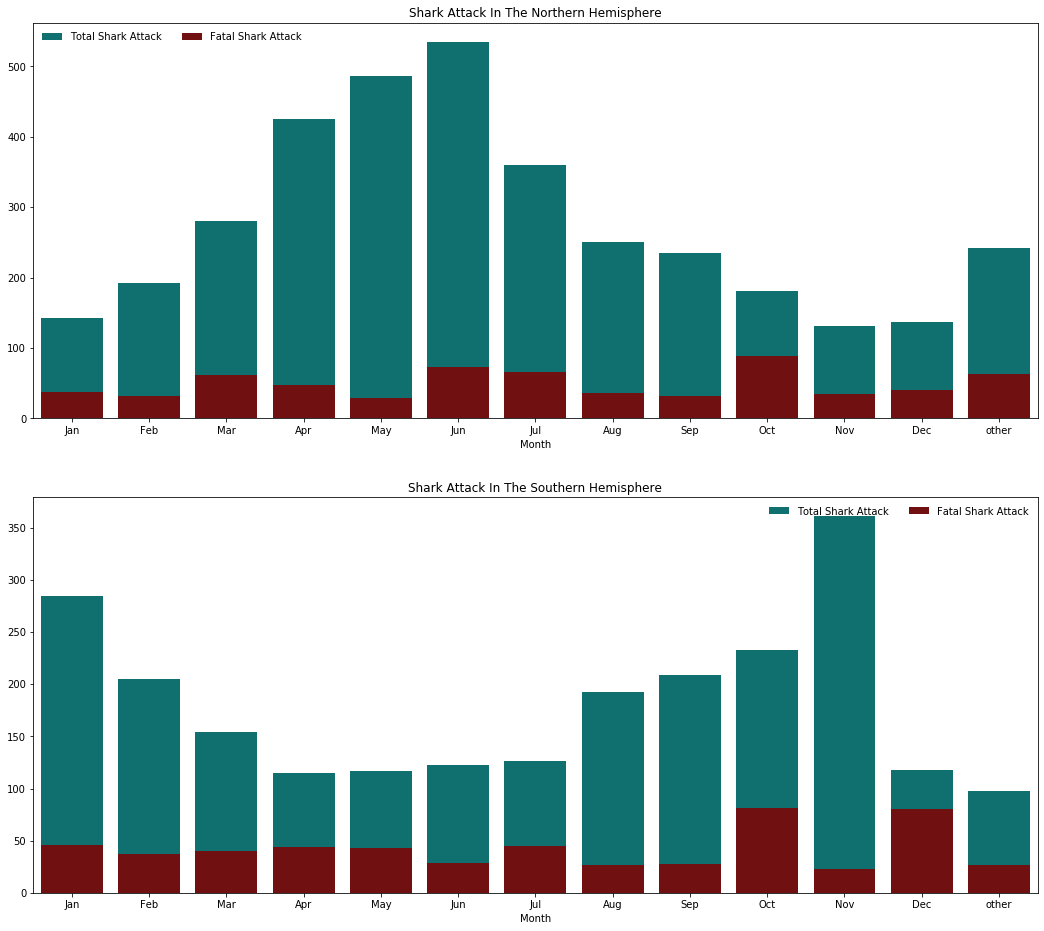

In [22]:
#Attacks by month, northern vs southern hemisphere 
fig = plt.figure(figsize=(18, 16))
ax1 = plt.subplot(211)
plt.title("Shark Attack In The Northern Hemisphere")
ax2 = plt.subplot(212)
plt.title("Shark Attack In The Southern Hemisphere")


p = sns.countplot(x="Months", data=shark_data[shark_data["Hemisphere"] == "N"], label="Total Shark Attack", color="teal", ax=ax1)
g = sns.countplot(x="Months", data=shark_data[(shark_data["Hemisphere"] == "N") & (shark_data["Fatal"] == "Y")], 
                  label="Fatal Shark Attack", color="maroon", ax=ax1)

v = sns.countplot(x="Months", data=shark_data[shark_data["Hemisphere"] == "S"], label="Total Shark Attack", color="teal", ax=ax2)
d = sns.countplot(x="Months", data=shark_data[(shark_data["Hemisphere"] == "S") & (shark_data["Fatal"] == "Y")], 
                  label="Fatal Shark Attack", color="maroon", ax=ax2)

m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','other']


ax1.legend(ncol=2, loc="upper left", frameon=False)
ax2.legend(ncol=2, loc="upper right", frameon=False)
p.set_xticklabels(m)
v.set_xticklabels(m)
ax1.set(ylabel="", xlabel="Month")
ax2.set(ylabel="", xlabel="Month")

[Text(0, 0.5, ''), Text(0.5, 0, 'Year')]

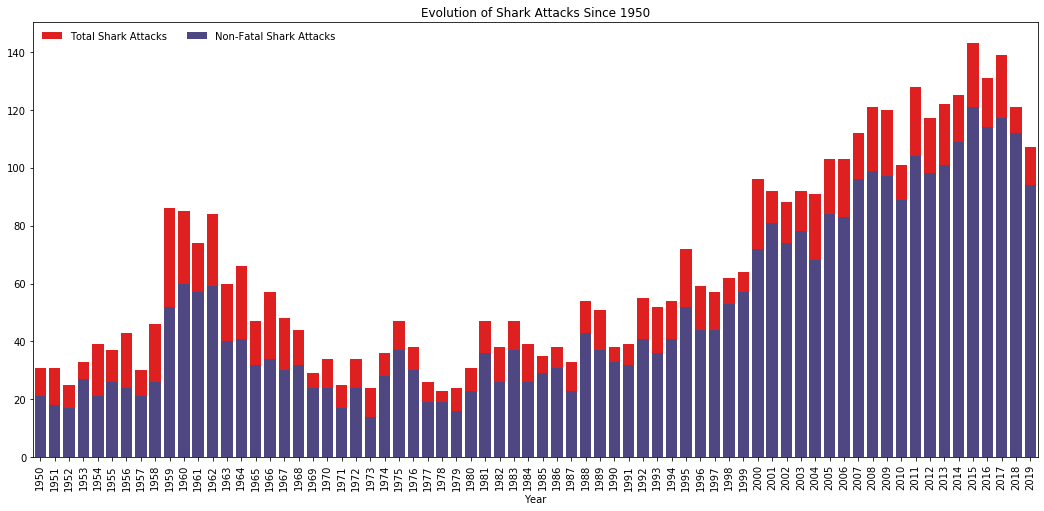

In [23]:
# Shark attacks since 1950 
fig, ax = plt.subplots(figsize=(18, 8))
plt.title("Evolution of Shark Attacks Since 1950")
p = sns.countplot(x="Year", data=shark_data[shark_data["Year"] >= 1950], label="Total Shark Attacks", color="r")
g = sns.countplot(x="Year", data=shark_data[(shark_data["Year"] >= 1950) & (shark_data["Fatal"] == "N")], 
                  label="Non-Fatal Shark Attacks", color="darkslateblue")
ax.legend(ncol=2, loc="upper left", frameon=False)
p.set_xticklabels(p.get_xticklabels(), rotation=90)
ax.set(ylabel="", xlabel="Year")

[Text(0, 0.5, ''), Text(0.5, 0, '')]

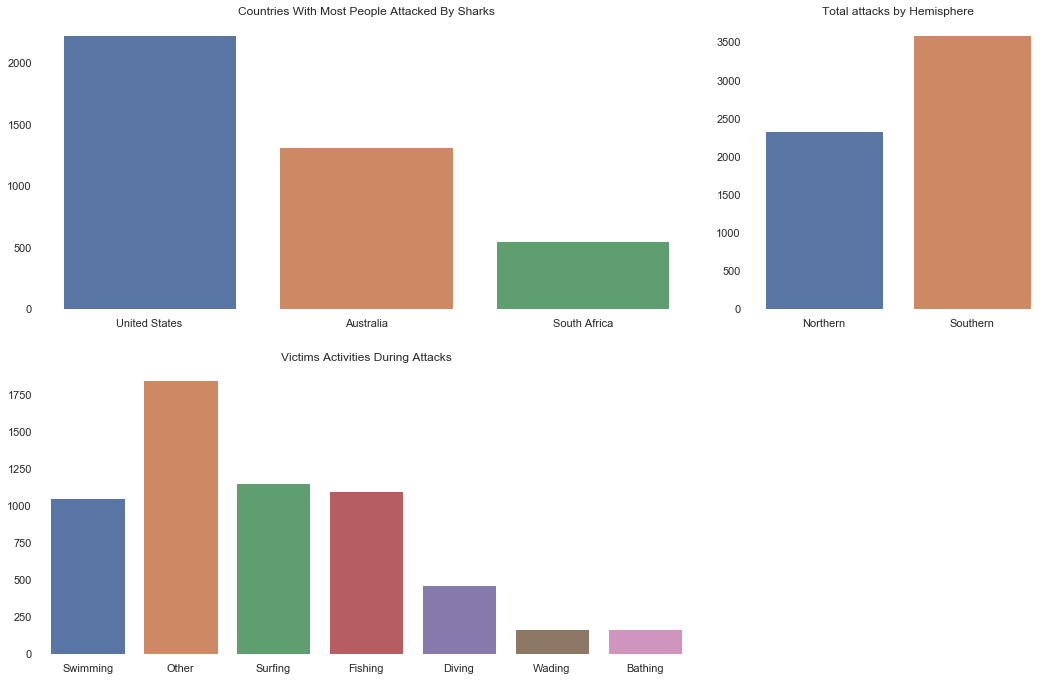

In [39]:

fig = plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=2)
plt.title('Countries With Most People Attacked By Sharks')
ax2 = plt.subplot2grid((3,3), (0,2))
plt.title('Total attacks by Hemisphere')
ax3 = plt.subplot2grid((3,3), (1,0), colspan=2)
plt.title('Victims Activities During Attacks')


g1 = sns.countplot(x="Country", data=shark_data, palette="deep", order=shark_data.Country.value_counts().iloc[:3].index, ax=ax1)
g2 = sns.countplot(x="Hemisphere", data=shark_data, palette="deep", ax=ax2)
g3 = sns.countplot(x="Activity", data=shark_data, palette="deep", ax=ax3)


sns.despine(left=True, bottom=True)
ax1.set(ylabel="", xlabel="")
ax2.set(ylabel="", xlabel="")
ax2.set_xticklabels(["Northern", "Southern"])
ax3.set(ylabel="", xlabel="")